<a href="https://colab.research.google.com/github/jvitorbarros15/Banking-Customer-Clustering/blob/main/Kmeans_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Project Goal

The objective of this project is to perform customer segmentation using unsupervised learning — specifically **KMeans clustering** — based on customers' annual income and spending behavior.

By identifying distinct customer groups, we can help businesses:
- Understand customer behavior
- Tailor marketing strategies
- Improve customer satisfaction and loyalty


## 1. Importing Depedencies

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## 2. Data Collection & Loading

In [6]:
import os
import pandas as pd

# Step 1: Download
import kagglehub
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

# Step 2: Construct full file path
csv_path = os.path.join(path, "Mall_Customers.csv")

# Step 3: Load into DataFrame
customer_data = pd.read_csv(csv_path)
customer_data.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Data Cleaning

In [7]:
customer_data.shape

(200, 5)

In [8]:
customer_data.describe().round()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.0,200.0,200.0,200.0
mean,100.0,39.0,61.0,50.0
std,58.0,14.0,26.0,26.0
min,1.0,18.0,15.0,1.0
25%,51.0,29.0,42.0,35.0
50%,100.0,36.0,62.0,50.0
75%,150.0,49.0,78.0,73.0
max,200.0,70.0,137.0,99.0


In [9]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
#Check any missing values
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## 4. Feature Selection

In [11]:
X = customer_data.iloc[:,[3,4]].values
y = customer_data.iloc[:,-1].values

## 5. Finding Optimal Number of Clusters – Elbow Method

In [12]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

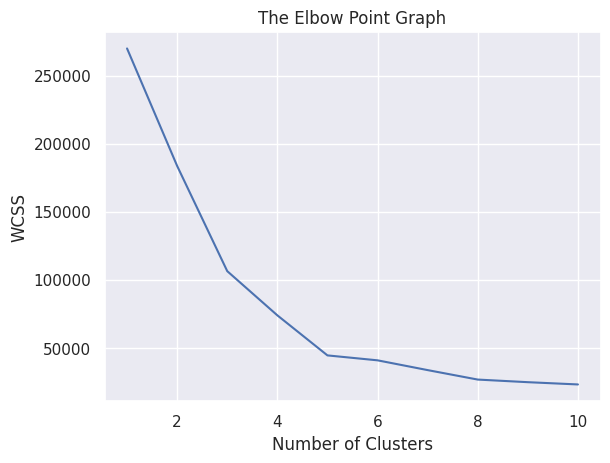

In [13]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimal Number of Clusters Is 5 According to the graph

## 6. Applying KMeans Clustering

We apply the KMeans algorithm using the optimal number of clusters (in this case, **5**) and assign a cluster label to each customer.

This process helps us group customers with similar income and spending characteristics.


In [16]:
from sklearn.preprocessing import StandardScaler

# Scale features (e.g., Annual Income and Spending Score)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_data.iloc[:, [3, 4]])

# Apply KMeans on scaled data
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
customer_data['Cluster'] = kmeans.labels_


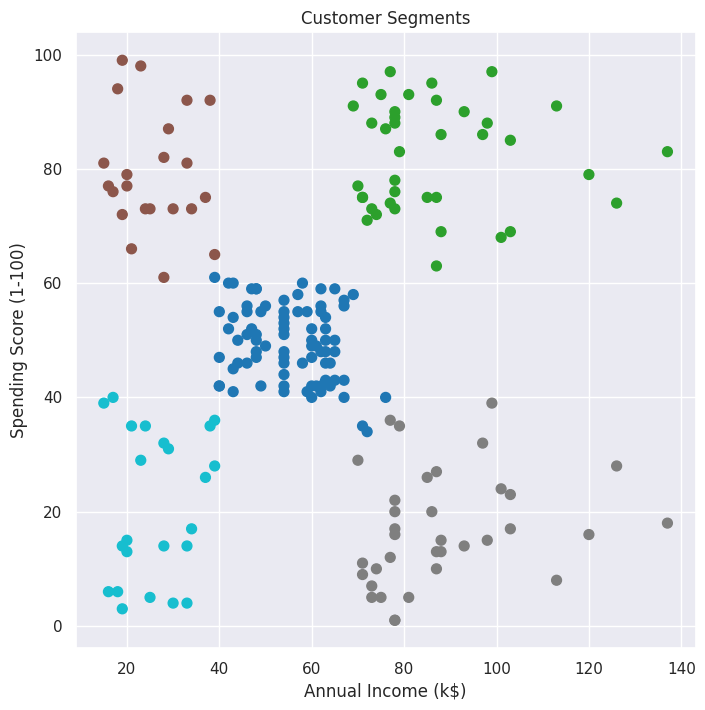

In [17]:
# visualize clusters on original scale for easier understanding

plt.figure(figsize=(8, 8))
plt.scatter(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'],
            c=customer_data['Cluster'], cmap='tab10', s=50)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


## 7. Interpreting Clusters

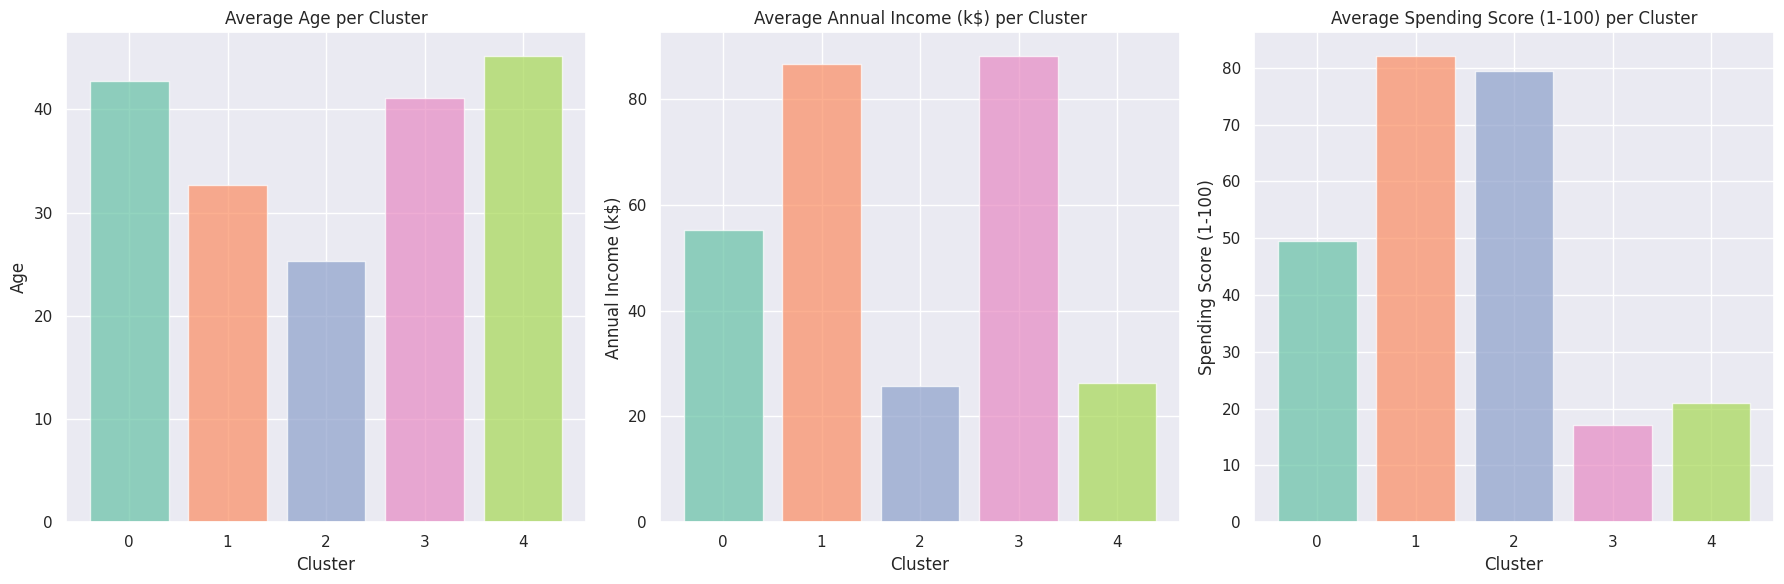

In [20]:
# Define features to analyze
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

fig = plt.figure(figsize=(18, 6))

for i, column in enumerate(features):
    df_plot = customer_data.copy()
    df_plot['Cluster'] = kmeans.labels_  # use labels_ directly

    grouped = df_plot.groupby('Cluster')[column].mean()

    ax = fig.add_subplot(1, 3, i + 1)
    ax.bar(grouped.index, grouped.values, color=sns.color_palette('Set2'), alpha=0.7)
    ax.set_title(f'Average {column} per Cluster', fontsize=12)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(column)
    ax.grid(True)

plt.tight_layout()
plt.show()


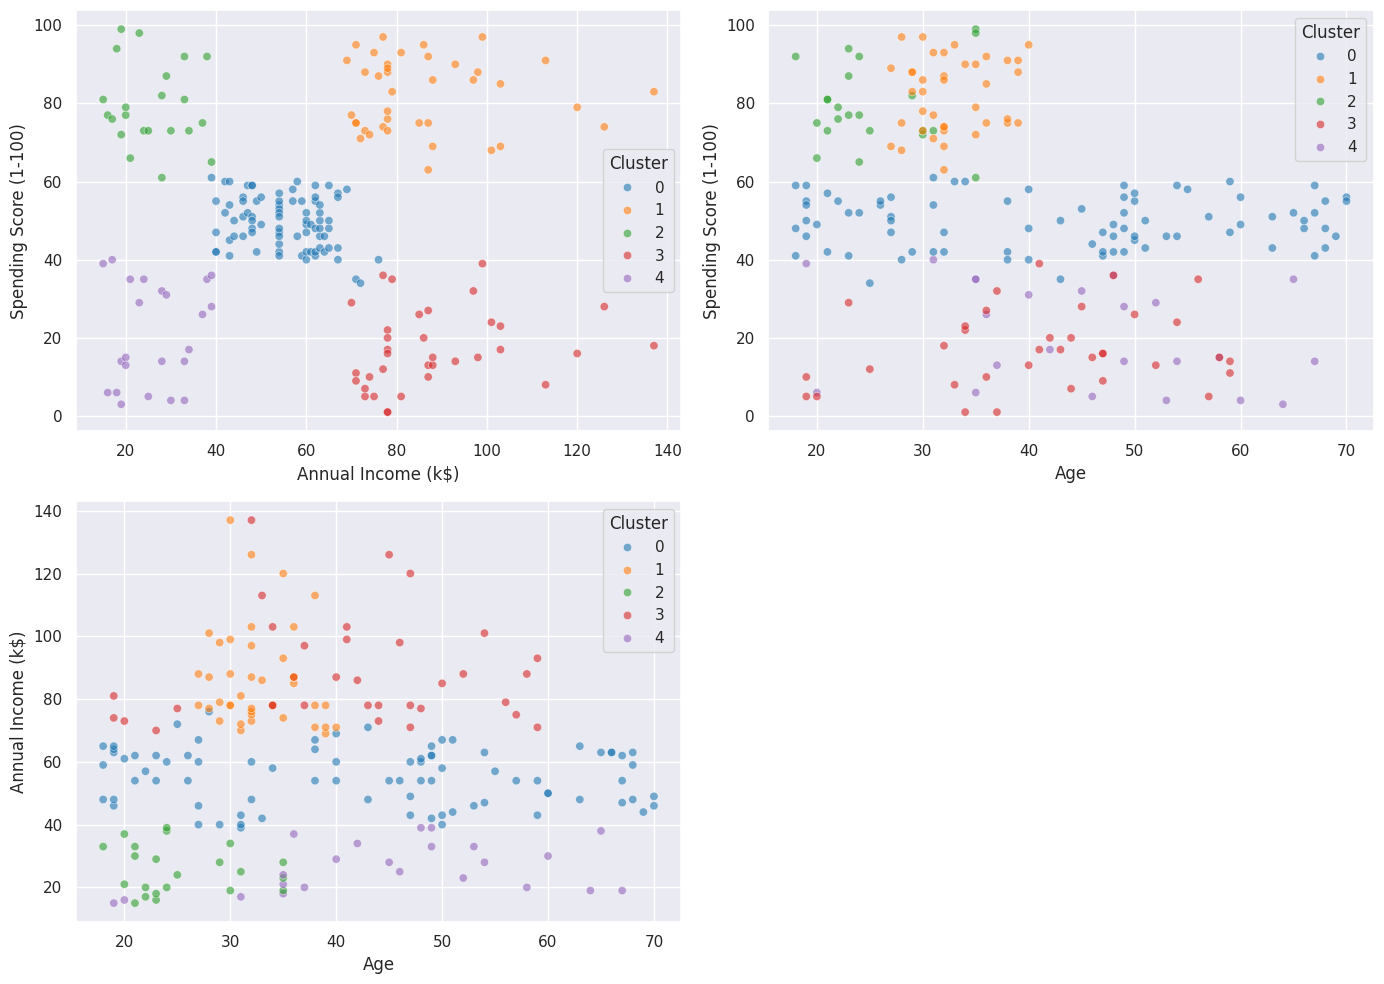

In [19]:
fig, ((ax1, ax2), (ax3, _)) = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=customer_data,
                palette='tab10', alpha=0.6, ax=ax1)

sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=customer_data,
                palette='tab10', alpha=0.6, ax=ax2)

sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=customer_data,
                palette='tab10', alpha=0.6, ax=ax3)

fig.delaxes(_)

plt.tight_layout()
plt.show()


## ✅ Final Analysis & Insights

Using KMeans clustering with 5 clusters on mall customer data, we successfully segmented customers into distinct groups based on **Age**, **Annual Income (k$)**, and **Spending Score (1–100)**.

The visualizations reveal clear behavioral patterns:

### 🔍 Cluster Profiles:

- **Cluster 0** – *Mid-income, average spenders, middle-aged*
  - Moderate income and moderate spending
  - Represents stable, possibly loyal customers

- **Cluster 1** – *High-income, high spenders, younger adults*
  - High potential segment with strong purchasing behavior
  - Ideal for luxury or premium product targeting

- **Cluster 2** – *Low-income, very high spenders, youngest group*
  - Very young demographic with high spending despite low income
  - May respond well to promotions and trend-driven campaigns

- **Cluster 3** – *High-income, low spenders, middle-aged*
  - Customers with capacity to spend more but currently under-engaged
  - Opportunity for reactivation or personalized offers

- **Cluster 4** – *Low-income, low spenders, older customers*
  - Conservative segment, potentially fixed-income earners
  - Likely to respond to trust-based, value-driven marketing

---

### 💡 Business Implications:

- Tailored campaigns can be developed based on cluster behavior
- Identify underperforming segments with potential for upselling
- Maximize ROI by investing more in high-spending clusters (1 & 2)
- Loyalty programs or re-engagement strategies could help convert Cluster 3

---

### ✅ Key Takeaways:

- Clustering using **Annual Income** and **Spending Score** gives powerful insights with just two features
- **Demographic variables like Age** help interpret psychological or lifestyle tendencies
- KMeans is an effective unsupervised method for initial customer segmentation

This segmentation approach supports **data-driven decision making** for marketing, customer engagement, and product positioning.